# Exercise: Convolutional Neural Network
---

In this exercise you will implement a convolutional neural network (task2). The goal is for you to get experience with selecting:
- Number of convolutional layers
- Number of filters in each convolutional layer
- Choice of activation function
- Choice of initialization of the weights
- Number of fully connected layers and their size
- Learning rate

Before starting to design a convolutional neural network, it is important to understand how the theoretical receptive field changes with filter size and stride (pooling). You will calculate the theoretical receptive field for a couple of given network architectures in task1.


Links:
- [Task1: Calculation of the theoretical receptive field](#Task1)
- [Task2: Classification of MNIST Fashion using convolutional neural network](#Task2)


Software version:
- Python 3.6
- TensorFlow 1.4.0


<a id='Task1'></a>
### Task1: Calculation of the theoretical receptive field
---

You shall implement equation(1) and use it to calculate the receptive field for 5 different convolutional neural network architectures. When evaluating the receptive field, the image size (resolution) and the size of the objects of interest is important to consider.


- Receptive field: 𝑅 
- Filter size: 𝐹
- Stride: 𝑠
- Layer index: 𝑘

Equation (1)

 $$R_k = R_{k-1} + \bigg[ (F_k -1)\cdot \prod_{i=1}^{k-1} s_i      \bigg] $$
 

---

<img src="images/receptive_field2.png" alt="Drawing" style="width: 600px;"/>





In [1]:
def receptive_field(f, s):
    # Inputs:
    # f: A list of the filter size for each layer
    # s: A list of the stride for each layer
    
    # Output
    # R: The calculated receptive field for each layer as a list
    
    # To do: 
    # Implement equation(1)
    R = [1]
    for kk in range(len(s)):
        S = 1
        for ii in range(kk):
            S = S * s[ii]
        fov = R[-1] + (f[kk] - 1) * S
        R.append(fov)
    return R

In [2]:
# Defining the architectures

# Architecture1
A1_filterSize = [3, 3, 3, 3, 3, 3]
A1_stride     = [1, 1, 1, 1, 1, 1]
A1_Recept     = receptive_field(A1_filterSize, A1_stride)

# Architecture2
A2_filterSize = [3, 3, 3, 3, 3, 3]
A2_stride     = [2, 1, 2, 1, 2, 1]
A2_Recept     = receptive_field(A2_filterSize, A2_stride)

# Architecture3
A3_filterSize = [3, 3, 3, 3, 3, 3]
A3_stride     = [2, 2, 2, 2, 2, 2]
A3_Recept     = receptive_field(A3_filterSize, A3_stride)

# Architecture4
A4_filterSize = [5, 5, 5, 5, 5, 5]
A4_stride     = [1, 1, 1, 1, 1, 1]
A4_Recept     = receptive_field(A4_filterSize, A4_stride)

# Architecture5
A5_filterSize = [5, 5, 5, 5, 5, 5]
A5_stride     = [2, 1, 2, 1, 2, 1]
A5_Recept     = receptive_field(A5_filterSize, A5_stride)

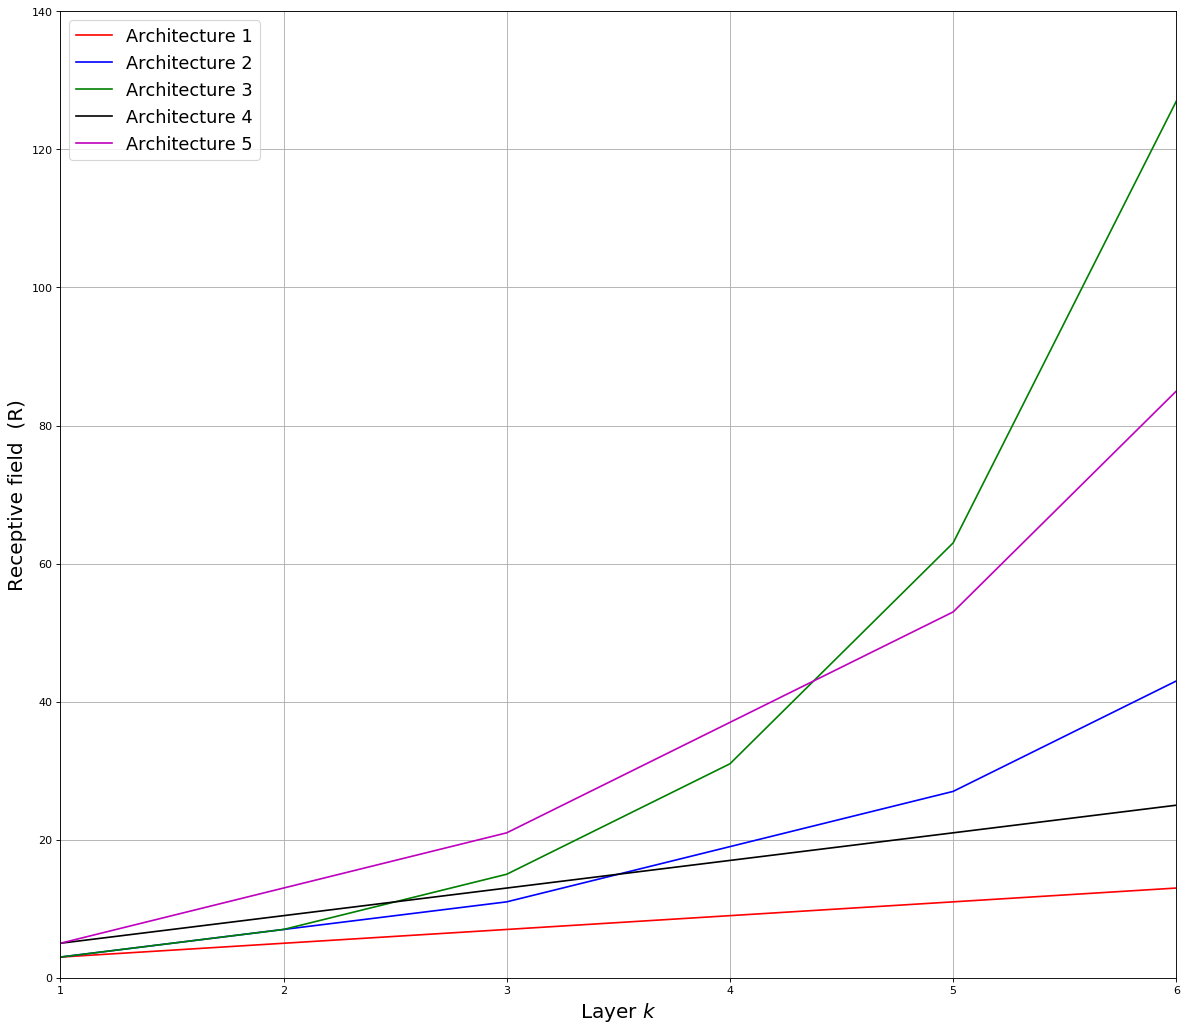

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(1, 1, 1)
plt.plot(np.array(A1_Recept), 'r', label='Architecture 1')
plt.plot(np.array(A2_Recept), 'b', label='Architecture 2')
plt.plot(np.array(A3_Recept), 'g', label='Architecture 3')
plt.plot(np.array(A4_Recept), 'k', label='Architecture 4')
plt.plot(np.array(A5_Recept), 'm', label='Architecture 5')
plt.ylabel('Receptive field  (R)', fontsize=18)
plt.xlabel('Layer $k$', fontsize=18)
ax.grid()
plt.ylim([0, 140])
plt.xlim([1, 6])
ax.legend(loc='upper left', fontsize=16)

---

<a id='Task2'></a>
### Task2: Classification of MNIST Fashion using convolutional neural network

---
You will implement a convolution neural network to classify the MNIST fashion dataset. The MNIST fashion dataset includes 10 classes: 
- ['T-shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'].  

The training set consists of 60,000 images and the test set consists of 10,000 images. The images are gray scale and of size [28,28,1]. Before you start, you need to download the MNIST fashion dataset. This can be done by running "get_datasets.sh" found in the "dataset" folder, or by downloading the dataset from https://github.com/zalandoresearch/fashion-mnist (remember to move the downloaded files into the "dataset" folder).


Your main task is to fill in the missing code in the following functions:
  - convLayer2D()
  - flatten()
  - fullyConnectedLayer()
  

You will also need to define the network architecture yourself. That is done by modifying the lists:
- numbOfFilters 
- strides       
- kernelSizes 
- hiddenLayerSizes


---


- <b>"%matplotlib inline"</b> is used to plot figures within the jupyter notebook
- <b>"tf.reset_default_graph()"</b> is added to clear the TensorFlow graph from any previous nodes/operations.

In [5]:
import tensorflow as tf
from utils import dataClass
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline
tf.reset_default_graph()

/home/mathias/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


---
Implement the convolutional layer function, convLayer2D.

In [6]:
def convLayer2D(data, filters_out=16, kernelSize=(3,3), stride=(1,1), name=None):
    # Input parameters:
    # - "data"         : Input data in format [N, Ny, Nx, C]. N=batch size, Ny/Nx=spatial dimension, C=number of channels
    # - "filters_out"  : The number of filers (channel dimension)
    # - "kernelSize"   : The kernel size in dimension Ny and Nx 
    # - "stride"       : The stride in dimension Ny and Nx 
    # - "name"         : The variable scope of the conv layer

    # Output parameters:
    # - "conv": Output of the convolutional layer

    # To do:
    # Implement the convolutional layer. The layer should include biases and an activation function. 
    # You shall use tf.nn.conv2d, and you cannot use tf.layer.conv etc

    c0 = data.get_shape().as_list()[3]
    c1 = filters_out
    ny = kernelSize[0]
    nx = kernelSize[1]
    with tf.variable_scope(name):
        w = tf.get_variable(name='W', shape=(ny, nx, c0, c1), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
        b = tf.get_variable(name='b', shape=c1,               dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
    conv = tf.nn.conv2d(input=data, filter=w, strides=(1, stride[0], stride[1], 1), padding="SAME")
    conv = tf.nn.bias_add(value=conv, bias=b)
    return conv

---
The data has to be flattened after the last convolutional layer and before the first fully connected layer. 

In [7]:
def flatten(data):
    # Input: A tensor of shape [N, Ny, Nx, C]: N=batch size, Ny/Nx=spatial dinention, C=number of channels
    # Output: A flattened version of "data" with shape [N, Ny*Nx*C]
    data = tf.contrib.layers.flatten(inputs=data)
    return data

---
Implement a fully connected layer using tf.matmul()


In [8]:
def fullyConnectedLayer(data, hiddenLayerSize, useActivationFunc=False):
    # N -> number of training samples
    # D1 -> number of input features
    # D2 -> number of output features    
    
    # Inputs:
    # data: Shape [N, D1] 
    # hiddenLayerSize: int D2
    
    #Output:
    # the output shall have the shape [N,D2]

    ny = data.get_shape().as_list()[1]
    nx = hiddenLayerSize
    W = tf.get_variable(name='W', shape=(ny, nx), initializer=tf.contrib.layers.xavier_initializer())
    z = tf.matmul(data, W, name='matmul')
    if useActivationFunc==True:
        # use an activation function
        a = tf.tanh(z, name='activation_function')
    else:
        # Do not use an activation function
        a = z
    return a

---
The following cell creates an instance of the class dataClass. The instance "myData" loads all the MNIST fashion images. The images are of size $[28,28,1]$. The dataClass have useful functions:
- next_training_batch(batch_size)
- get_test_data()


To be able to feed the training and the test data into the tensorflow graph, we define tf.placeholders for the data and the corresponding labels (onehot format). The "global_step" variable will be used to count the number of training iterations.


In [9]:
#Load MNIST fashion data
datapath = 'datasets/'
myData      = dataClass.dataClassCNN(datapath)
print(myData)
#Define placeholders for being able to feed data to the tensorflow graph
data          = tf.placeholder(shape=(None, myData.numbOfFeatures[0],myData.numbOfFeatures[1],myData.numbOfFeatures[2]), dtype=tf.float32, name='data')
labels_onehot = tf.placeholder(shape=(None, myData.numbOfClasses),  dtype=tf.int32,   name='labels_onehot')
global_step   = tf.Variable(initial_value=0, trainable=False, name='global_step')

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/train-labels-idx1-ubyte.gz'

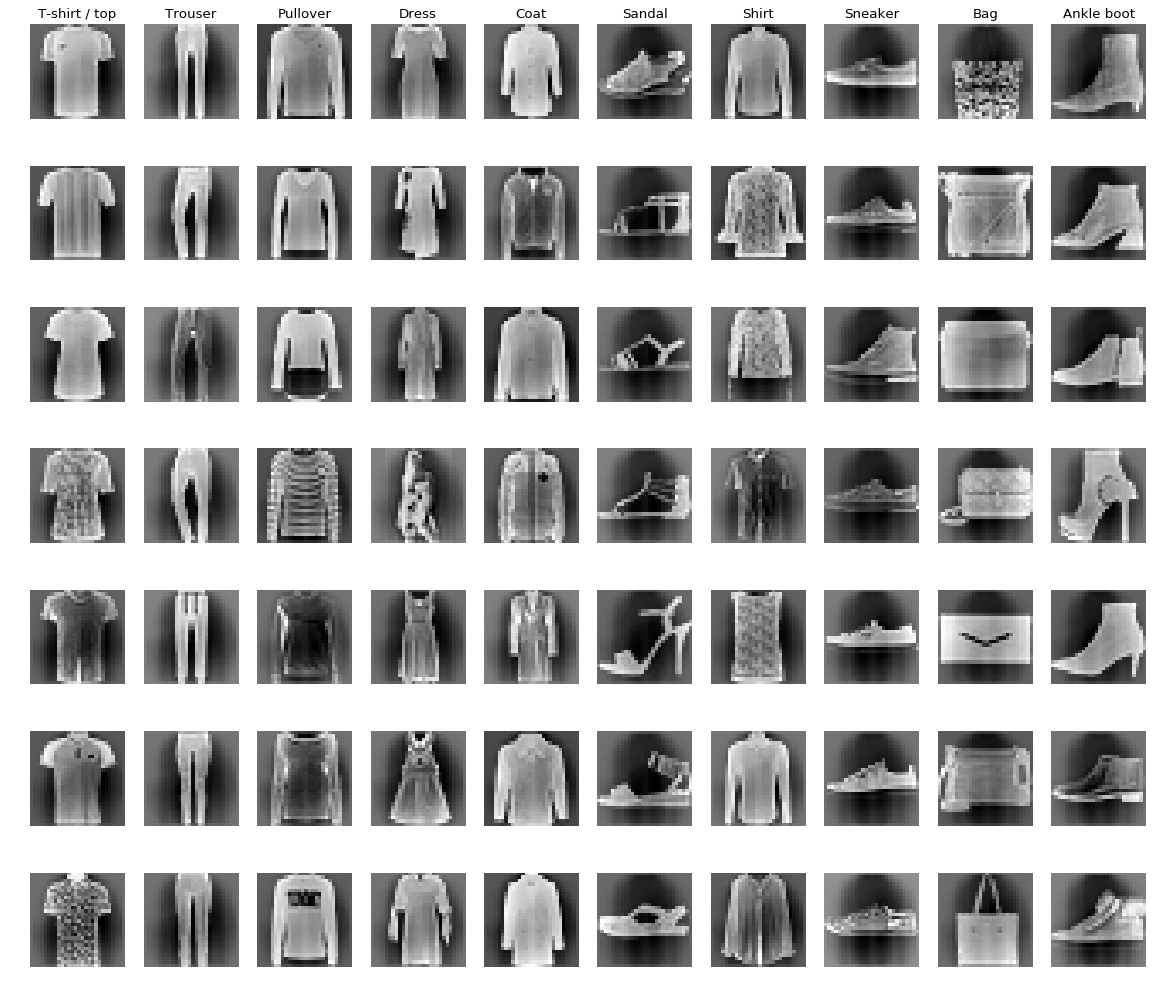

In [9]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['T-shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(classes)
samples_per_class = 7
plt.figure(figsize=(18, 16), dpi= 80)
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(myData.y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(myData.X_train[idx, :, :, 0], cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

---
The number of convolutional layers in the network is given by the length of the lists: numbOfFilters, strides and kernalSizes. To improve the classification accuracy you will need to modify the network architecture. Try to add convolutional layers and test with different strides, kernel sizes and number of filters


In [10]:
#numbOfFilters = [32, 32]
#strides       = [ [1,1], [1,1]]
#kernelSizes   = [ [3,3], [3,3] ]

numbOfFilters = [64, 64, 128, 128, 256, 256]
strides       = [ [1,1], [1,1], [2,2], [1,1], [1,1], [2,2] ]
kernelSizes   = [ [3,3], [3,3], [3,3], [3,3], [3,3], [3,3] ]

conv = data
for ii in range(len(numbOfFilters)):
    layerName = 'convLayer%s' % ii
    conv = convLayer2D(data, filters_out=numbOfFilters[ii], kernelSize=kernelSizes[ii], stride=strides[ii], name=layerName)

---
Convolutional neural networks often includes fully connected layers at the end. In the next cell you can specify the number of fully connected layers and their sizes by changing the list "hiddenLayerSizes".


In [11]:
#Flatten the data
conv = flatten(conv)

# Define the fully connected layers:
hiddenLayerSizes = [1024, 1024, 265, myData.numbOfClasses]
a = conv
for ii in range(len(hiddenLayerSizes)):
    layerName = 'FullyConnectedlayer%s' % ii
    with tf.variable_scope(layerName):
        if ii < len(hiddenLayerSizes) - 1:
            a = fullyConnectedLayer(a, hiddenLayerSizes[ii], useActivationFunc=True)
        else:
            a = fullyConnectedLayer(a, hiddenLayerSizes[ii])
logits = a

---
The loss is computed using the built in tensorflow function "tf.losses.softmax_cross_entropy". It calculates the softmax cross  entropy loss. If you want to improve the generalization of the network, you could try to add regularization loss?

In [12]:
#Define your loss function
loss    = tf.losses.softmax_cross_entropy(onehot_labels=labels_onehot, logits=logits)
regloss = 0
losses  = loss + regloss 

---
We define a gradient descent optimizer. We pass in the loss (losses) we want to minimize, and the list of the variables (weights) we want to minimize the loss with respect to. The minimizer returns an operation which we call, "train_op". Every time we want to perform a gradient descent step we will call <b>"train_op"</b> in the tf.Session.

The <b>"global_step"</b> variable is passed into the minimizer and is incremented for every gradient descent step.

We would like you to play with the learning_rate. Default <b>"learning_rate=0.05"</b>

In [13]:
#Define an optimizer
all_variables = tf.trainable_variables()
optimizer     = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_op      = optimizer.minimize(losses, global_step=global_step, var_list=all_variables)

---
The accuracy measure <b>"accuracy"</b> is calculated. Other possible measures could be: recall, precision, f1-score

In [14]:
#Calculate the accuracy
estimated_class = tf.argmax(logits, axis=1)
labels          = tf.argmax(labels_onehot, axis=1)
accuracy        = tf.reduce_mean(tf.cast(tf.equal(estimated_class, labels), tf.float32), name='accuracy')

---
Here is where the action takes place! The cell creates a <b>"tf.Session"</b> and trains the neural network by calling the <b>"train_op"</b>. Note, see how we use the two placeholders <b>"data"</b> and <b>"labels_onehot"</b> to feed the graph with new training images/labels. If training takes a long time try to reduce <b>"numbOfTrainingSteps"</b>.

You can try to play with the hyperparameters:
- numbOfTrainingSteps
- batch_size 






In [15]:
# Hyperparameters
numbOfTrainingSteps = 6000
batch_size          = 500

#Log train loss/accuracy and test loss/accuracy
train_loss     = np.zeros(numbOfTrainingSteps)
train_accuracy = np.zeros(numbOfTrainingSteps)
test_loss     = []
test_accuracy = []
test_inds     = []


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 
    timeZero = time.time()
    for ii in range(numbOfTrainingSteps):
        npData, npLabels_onehot   = myData.next_training_batch(batch_size)
        loss_val, accuracy_val, _ = sess.run([loss, accuracy, train_op],
                                             feed_dict={data: npData, labels_onehot: npLabels_onehot})
        train_loss[ii]         = loss_val
        train_accuracy[ii]     = accuracy_val

        #Block is printing accuracy, loss and ETA.
        if ii % 50 == 0:
            currentTime = time.time()-timeZero
            secPerIter  = currentTime/(ii+1)
            remTime     = (numbOfTrainingSteps - ii)*secPerIter
            remMin      = int(remTime/60)
            remSec      = remTime%60
            print('%0.2f | Accuracy=%f | loss=%f | ETA: min=%d, sec=%d' % ((ii/numbOfTrainingSteps), train_accuracy[ii], train_loss[ii], remMin, remSec))
        
        #Block is calculating test accuracy and loss
            if ii % 400 == 0:
                loss_avg_val     = 0
                accuracy_avg_val = 0
                testItr = int(np.ceil(myData.numbOfTestSamples/myData.test_batch_size))
                for tt in range(testItr):
                    npData, npLabels_onehot = myData.get_test_data()
                    loss_val, accuracy_val = sess.run([loss, accuracy], feed_dict={data: npData, labels_onehot: npLabels_onehot})
                    loss_avg_val += loss_val
                    accuracy_avg_val += accuracy_val
                test_loss.append(loss_avg_val/testItr)
                test_accuracy.append(accuracy_avg_val/testItr)
                test_inds.append(ii)
                printStr = '%0.2f | Test  Accuracy: %0.3f | Test Loss: %0.5f -----------' % ((ii/numbOfTrainingSteps), accuracy_avg_val/testItr, loss_avg_val/testItr)
                print(printStr)

0.00 | Accuracy=0.054000 | loss=2.655003 | ETA: min=67, sec=12
0.00 | Test  Accuracy: 0.510 | Test Loss: 1.84681 -----------
0.01 | Accuracy=0.808000 | loss=0.545932 | ETA: min=5, sec=9
0.02 | Accuracy=0.856000 | loss=0.426486 | ETA: min=4, sec=19
0.02 | Test  Accuracy: 0.831 | Test Loss: 0.47631 -----------
0.03 | Accuracy=0.862000 | loss=0.377410 | ETA: min=4, sec=10
0.03 | Accuracy=0.850000 | loss=0.413038 | ETA: min=3, sec=58
0.03 | Test  Accuracy: 0.844 | Test Loss: 0.44021 -----------
0.04 | Accuracy=0.866000 | loss=0.351813 | ETA: min=3, sec=56
0.05 | Accuracy=0.906000 | loss=0.302039 | ETA: min=3, sec=49
0.05 | Test  Accuracy: 0.846 | Test Loss: 0.42447 -----------
0.06 | Accuracy=0.916000 | loss=0.274828 | ETA: min=3, sec=47
0.07 | Accuracy=0.906000 | loss=0.271585 | ETA: min=3, sec=42
0.07 | Test  Accuracy: 0.865 | Test Loss: 0.38264 -----------
0.07 | Accuracy=0.904000 | loss=0.268324 | ETA: min=3, sec=41
0.08 | Accuracy=0.920000 | loss=0.243873 | ETA: min=3, sec=37
0.08 | T

0.73 | Test  Accuracy: 0.864 | Test Loss: 0.49186 -----------
0.74 | Accuracy=0.972000 | loss=0.062591 | ETA: min=1, sec=18
0.75 | Accuracy=0.974000 | loss=0.077256 | ETA: min=1, sec=15
0.75 | Test  Accuracy: 0.865 | Test Loss: 0.49012 -----------
0.76 | Accuracy=0.964000 | loss=0.095684 | ETA: min=1, sec=13
0.77 | Accuracy=0.956000 | loss=0.111841 | ETA: min=1, sec=10
0.77 | Test  Accuracy: 0.862 | Test Loss: 0.50920 -----------
0.78 | Accuracy=0.970000 | loss=0.085775 | ETA: min=1, sec=8
0.78 | Accuracy=0.964000 | loss=0.064664 | ETA: min=1, sec=5
0.78 | Test  Accuracy: 0.863 | Test Loss: 0.49929 -----------
0.79 | Accuracy=0.970000 | loss=0.089462 | ETA: min=1, sec=3
0.80 | Accuracy=0.972000 | loss=0.074576 | ETA: min=1, sec=0
0.80 | Test  Accuracy: 0.869 | Test Loss: 0.48981 -----------
0.81 | Accuracy=0.964000 | loss=0.116438 | ETA: min=0, sec=58
0.82 | Accuracy=0.978000 | loss=0.066448 | ETA: min=0, sec=55
0.82 | Test  Accuracy: 0.864 | Test Loss: 0.50689 -----------
0.82 | Accur

---
We plot the loss and the accuracy as a function of gradient descent steps to monitor the training.


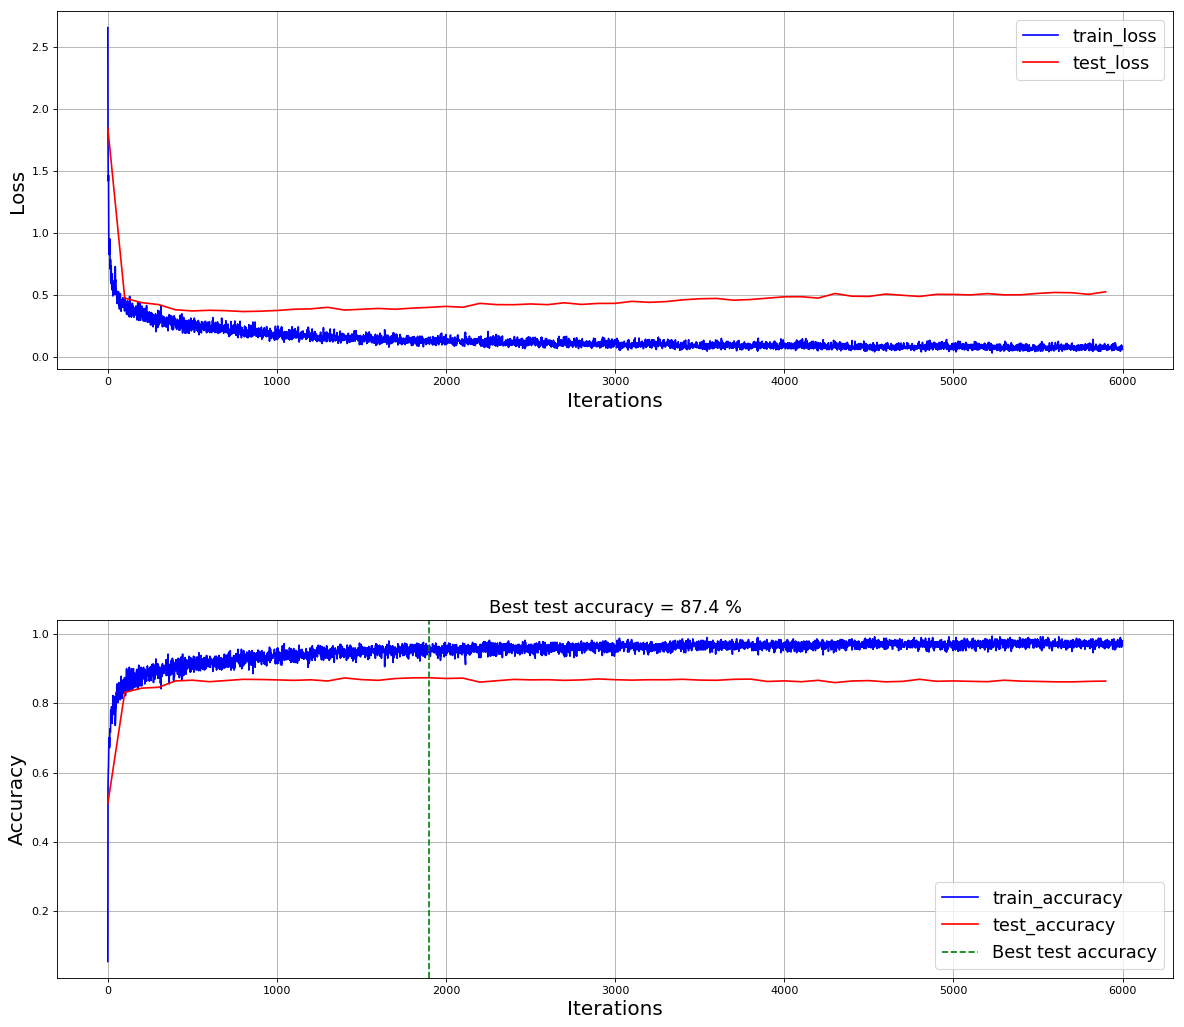

In [16]:
# Plot the training accuracy and the training loss
#plt.figure()
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(2, 1, 1)
# plt.subplots_adjust(hspace=2)
ax.plot(train_loss, 'b', label='train_loss')
ax.plot(np.array(test_inds), np.array(test_loss), 'r', label='test_loss')
ax.grid()
plt.ylabel('Loss', fontsize=18)
plt.xlabel('Iterations', fontsize=18)
ax.legend(loc='upper right', fontsize=16)

ax = plt.subplot(2, 1, 2)
plt.subplots_adjust(hspace=0.7)
ax.plot(train_accuracy, 'b', label='train_accuracy')
ax.plot(np.array(test_inds), np.array(test_accuracy), 'r', label='test_accuracy')
ax.grid()
plt.ylabel('Accuracy', fontsize=18)
plt.xlabel('Iterations', fontsize=18)
max_test_acc_val = np.max(np.array(test_accuracy))
ind_max_test_acc_val = test_inds[np.argmax(np.array(test_accuracy))]
plt.axvline(x=ind_max_test_acc_val, color='g', linestyle='--', label='Best test accuracy')
plt.title('Best test accuracy = %0.1f %%' % (max_test_acc_val*100), fontsize=16)
ax.legend(loc='lower right', fontsize=16)
plt.ion()